# Taxi Cab

## Download the files
`kaggle competitions download -c new-york-city-taxi-fare-prediction`

I actually saved it offline and process because the size is so large.

In [85]:
# get the data file
# !pip install kaggle

# Clean up the data

In [86]:
# Import the file, and only keep 10000 rows for now
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [87]:
train_df = pd.read_csv('./data/train.csv', nrows = 10000)
test_df = pd.read_csv('./data/test.csv', nrows = 10000)

In [88]:
# Check out the column names and 
# column's data type to get used to the data.
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [89]:
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [90]:
# check if there's any NaN value inside the data set and remove it
train_df.isna().sum()
train_df = train_df.dropna(how = 'any', axis = 'rows')

key -> time of when the data is recorded -> not relevant -> can drop

In [91]:
# drop key from train and test
train_df = train_df.drop(['key'], axis=1)
test_df = test_df.drop(['key'], axis=1)

In [92]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992058,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


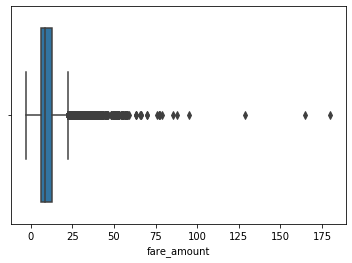

In [93]:
sns.boxplot(x=train_df['fare_amount'])

In [94]:
# some trip cost more than 175 dollar,
# some trip cost less than 0 dollar.
# let's normalize our dataset.
condition1 = (train_df['fare_amount'] > 0)
condition2 = train_df['fare_amount'] < ((train_df['fare_amount'].mean() + \
              3 * train_df['fare_amount'].std()))
train_df = train_df.loc[condition1 & condition2]

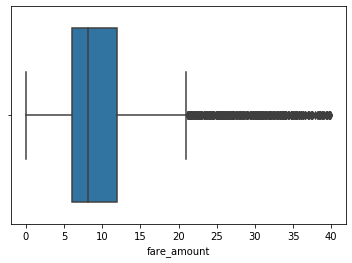

In [95]:
sns.boxplot(x=train_df['fare_amount'])

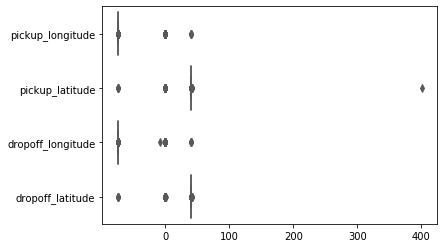

In [96]:
sns.boxplot(data=train_df[['pickup_longitude',\
                           'pickup_latitude', \
                           'dropoff_longitude',\
                           'dropoff_latitude']], orient='h', palette='Set2')

Ok, we know from here that NYC's longitude and latitude is 40.73 and -73.9. There is definitely outlier in this dataset, which is needed to be removed.

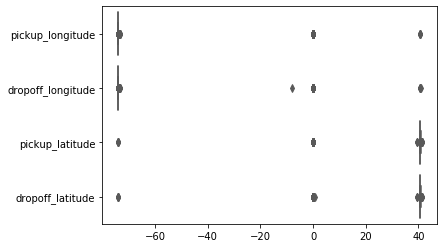

In [97]:
# let's remove the one far out at 400 in the pickup latitude
train_df = train_df[train_df['pickup_latitude'] < 100]
sns.boxplot(data=train_df[['pickup_longitude',\
                           'dropoff_longitude',\
                           'pickup_latitude', \
                           'dropoff_latitude']], orient='h', palette='Set2')

In [98]:
# pick up
# Let's restrict latitude coordinate near 40-42
condition1 = train_df['pickup_latitude'] > 40
condition2 = train_df['pickup_latitude'] < 42
# Let's restrict longitude coordinate near -74 - -72
condition3 = train_df['pickup_longitude'] > -74
condition4 = train_df['pickup_longitude'] < -72

# drop off
# Let's restrict latitude coordinate near 40-42
condition5 = train_df['dropoff_latitude'] > 40
condition6 = train_df['dropoff_latitude'] < 42
# Let's restrict longitude coordinate near -74 - -72
condition7 = train_df['dropoff_longitude'] > -74
condition8 = train_df['dropoff_longitude'] < -72

In [99]:
train_df=train_df.loc[condition1 & \
                 condition2 & \
                 condition3 & \
                 condition4 & \
                 condition5 & \
                 condition6 & \
                 condition7 & \
                 condition8]

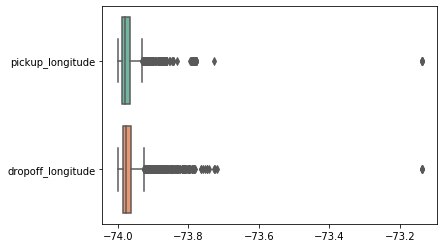

In [100]:
# let see how it looks now.
sns.boxplot(data=train_df[['pickup_longitude',\
                           'dropoff_longitude']], orient='h', palette='Set2')

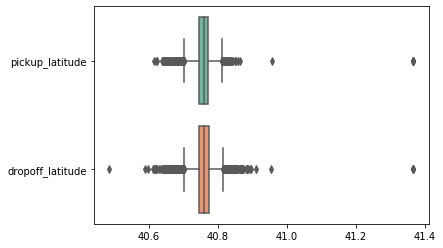

In [101]:
sns.boxplot(data=train_df[['pickup_latitude', \
                           'dropoff_latitude']], orient='h', palette='Set2')

# Deriving Features

In [102]:
# Let see what is actually printing on the datetime
print(train_df.pickup_datetime[0])

2009-06-15 17:26:21 UTC


`'2009-06-15 17:26:21 UTC'`
We can probably just keep only the numbers and timezone we can specify by the `datetime` package